# The Data

Here I give an overview of the data, and an overview of the data directory structure. Images are available for four magnitues (40x, 100x, 200x, and 400x). For this whole capston project I will only use the images with magnitude 40x.

## 1. Description

The data comes from the Breast Cancer Histopathological Database (BreakHis) and is available on [kaggle](https://www.kaggle.com/ambarish/breakhis) (Version 4, last updated on 2020-03-10), and on request on [web.inf.ufpr.br](https://web.inf.ufpr.br/vri/databases/breast-cancer-histopathological-database-breakhis/).

Context/content is quoted there as follows: 

«The Breast Cancer Histopathological Image Classification (BreakHis) is composed of 9,109 microscopic images of breast tumor tissue collected from 82 patients using different magnifying factors (40X, 100X, 200X, and 400X). To date, it contains 2,480 benign and 5,429 malignant samples (700X460 pixels, 3-channel RGB, 8-bit depth in each channel, PNG format). This database has been built in collaboration with the P&D Laboratory – Pathological Anatomy and Cytopathology, Parana, Brazil [http://www.prevencaoediagnose.com.br](http://www.prevencaoediagnose.com.br). [...] Both breast tumors benign and malignant can be sorted into different types based on the way the tumoral cells look under the microscope. Various types/subtypes of breast tumors can have different prognoses and treatment implications. The dataset currently contains four histological distinct types of benign breast tumors: adenosis (A), fibroadenoma (F), phyllodes tumor (PT), and tubular adenona (TA); and four malignant tumors (breast cancer): carcinoma (DC), lobular carcinoma (LC), mucinous carcinoma (MC) and papillary carcinoma (PC).»

## 2. Structure of `data` directory

```
data
├── breast
│   ├── 100X
│   │   ├── adenosis
│   │   ├── ductal_carcinoma
│   │   ├── fibroadenoma
│   │   ├── lobular_carcinoma
│   │   ├── mucinous_carcinoma
│   │   ├── papillary_carcinoma
│   │   ├── phyllodes_tumor
│   │   └── tubular_adenoma
│   ├── 200X
│   │   ├── adenosis
│   │   ├── ductal_carcinoma
│   │   ├── fibroadenoma
│   │   ├── lobular_carcinoma
│   │   ├── mucinous_carcinoma
│   │   ├── papillary_carcinoma
│   │   ├── phyllodes_tumor
│   │   └── tubular_adenoma
│   ├── 400X
│   │   ├── adenosis
│   │   ├── ductal_carcinoma
│   │   ├── fibroadenoma
│   │   ├── lobular_carcinoma
│   │   ├── mucinous_carcinoma
│   │   ├── papillary_carcinoma
│   │   ├── phyllodes_tumor
│   │   └── tubular_adenoma
│   ├── 40X
│   │   ├── adenosis
│   │   ├── ductal_carcinoma
│   │   ├── fibroadenoma
│   │   ├── lobular_carcinoma
│   │   ├── mucinous_carcinoma
│   │   ├── papillary_carcinoma
│   │   ├── phyllodes_tumor
│   │   └── tubular_adenoma
│   └── 40Xpatches
├── split
└── HLfeatures
```

## 3. Import packages

In [1]:
import tensorflow as tf
import numpy as np
import os
import re
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline

## 4. Define image generators

In [2]:
image_generator = ImageDataGenerator(rescale=1/255)

#### Generator for 40x images

In [3]:
image40X = image_generator.flow_from_directory(
    os.path.join('data','breast','40X'),
    batch_size=64, 
    target_size=(460, 700),
    class_mode = 'sparse',
    shuffle=True,
    subset='training')

Found 1995 images belonging to 8 classes.


#### Generator for 100x images

In [4]:
image100X = image_generator.flow_from_directory(
    os.path.join('data','breast','100X'),
    batch_size=32, 
    target_size=(460, 700),
    class_mode = 'sparse',
    shuffle=True,
    subset='training')

Found 2081 images belonging to 8 classes.


#### Generator for 200x images

In [5]:
image200X = image_generator.flow_from_directory(
    os.path.join('data','breast','200X'),
    batch_size=32, 
    target_size=(460, 700),
    class_mode = 'sparse',
    shuffle=True,
    subset='training')

Found 2013 images belonging to 8 classes.


#### Generator for 400x images

In [6]:
image400X = image_generator.flow_from_directory(
    #os.path.join('data','breast','SOB'),
    os.path.join('data','breast','400X'),
    batch_size=32, 
    target_size=(460, 700),
    class_mode = 'sparse',
    shuffle=True,
    subset='training')

Found 1820 images belonging to 8 classes.


## 5. Number of images per class

#### Print class names

In [7]:
list(image40X.class_indices)

['adenosis',
 'ductal_carcinoma',
 'fibroadenoma',
 'lobular_carcinoma',
 'mucinous_carcinoma',
 'papillary_carcinoma',
 'phyllodes_tumor',
 'tubular_adenoma']

#### Print shape of images and labels

In [8]:
imgs, labels = image40X.next()
print('Images:', imgs.shape)
print('Labels:', labels.shape)

Images: (64, 460, 700, 3)
Labels: (64,)


#### Number of images per class for magnitude 40x

In [9]:
for i in range(8):
    lb = list(image40X.class_indices)[i]
    print(sum(image40X.labels==i), ': 40x',lb)
print(image40X.n,': Total images with magnitude 40x',)

114 : 40x adenosis
864 : 40x ductal_carcinoma
253 : 40x fibroadenoma
156 : 40x lobular_carcinoma
205 : 40x mucinous_carcinoma
145 : 40x papillary_carcinoma
109 : 40x phyllodes_tumor
149 : 40x tubular_adenoma
1995 : Total images with magnitude 40x


#### Number of images per class for magnitude 100x

In [10]:
for i in range(8):
    lb = list(image100X.class_indices)[i]
    print(sum(image100X.labels==i), ': 100x',lb)
print(image100X.n,': Total images with magnitude 100x',)

113 : 100x adenosis
903 : 100x ductal_carcinoma
260 : 100x fibroadenoma
170 : 100x lobular_carcinoma
222 : 100x mucinous_carcinoma
142 : 100x papillary_carcinoma
121 : 100x phyllodes_tumor
150 : 100x tubular_adenoma
2081 : Total images with magnitude 100x


#### Number of images per class for magnitude 200x

In [11]:
for i in range(8):
    lb = list(image200X.class_indices)[i]
    print(sum(image200X.labels==i), ': 200x',lb)
print(image200X.n,': Total images with magnitude 200x',)

111 : 200x adenosis
896 : 200x ductal_carcinoma
264 : 200x fibroadenoma
163 : 200x lobular_carcinoma
196 : 200x mucinous_carcinoma
135 : 200x papillary_carcinoma
108 : 200x phyllodes_tumor
140 : 200x tubular_adenoma
2013 : Total images with magnitude 200x


#### Number of images per class for magnitude 400x

In [12]:
for i in range(8):
    lb = list(image400X.class_indices)[i]
    print(sum(image400X.labels==i), ': 400x',lb)
print(image400X.n,': Total images with magnitude 400x',)

106 : 400x adenosis
788 : 400x ductal_carcinoma
237 : 400x fibroadenoma
137 : 400x lobular_carcinoma
169 : 400x mucinous_carcinoma
138 : 400x papillary_carcinoma
115 : 400x phyllodes_tumor
130 : 400x tubular_adenoma
1820 : Total images with magnitude 400x


For each magnitude (40x, 100x, 200x, and 400x) classes are quite unbalanced, e.x., class ductal carcinoma has a lot more images than the other classes for each magnitude.

## 6. Plot sample images

#### Plot sample images for magnitude 40x

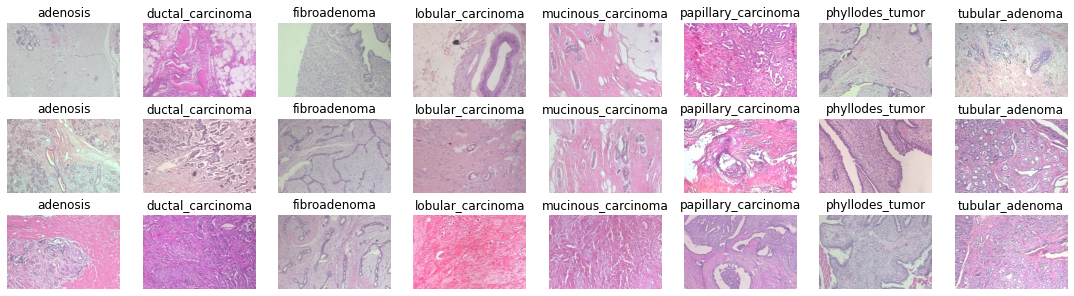

In [13]:
fig, axs = plt.subplots(3,8, figsize=(19,5))
for i in range(8):
    image40X.reset()
    while True:
        imgs, labels = image40X.next()
        imgs_cat = imgs[labels==i,:,:,:]
        labs_cat = list(image40X.class_indices)[i]
        if np.alen(imgs_cat) > 2:
            break
    for j in range(3):
        axs[j,i].imshow(imgs_cat[j,:,:,:])
        axs[j,i].set_title(labs_cat)
        axs[j,i].axis('off')

#### Plot sample images for magnitude 100x

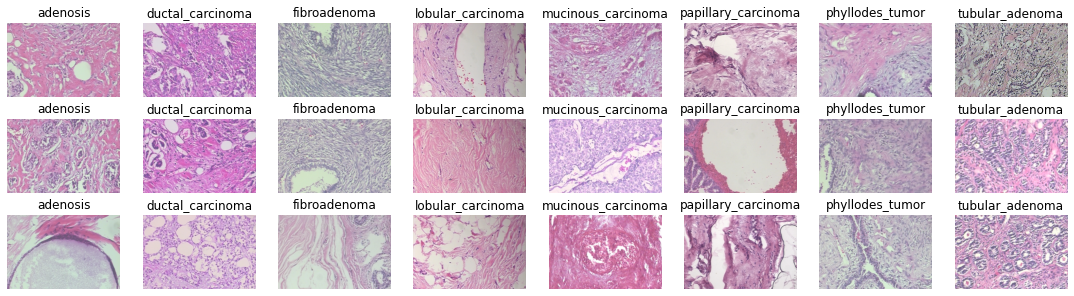

In [14]:
fig, axs = plt.subplots(3,8, figsize=(19,5))
for i in range(8):
    image100X.reset()
    while True:
        imgs, labels = image100X.next()
        imgs_cat = imgs[labels==i,:,:,:]
        labs_cat = list(image100X.class_indices)[i]
        if np.alen(imgs_cat) > 2:
            break
    for j in range(3):
        axs[j,i].imshow(imgs_cat[j,:,:,:])
        axs[j,i].set_title(labs_cat)
        axs[j,i].axis('off')

#### Plot sample images for magnitude 200x

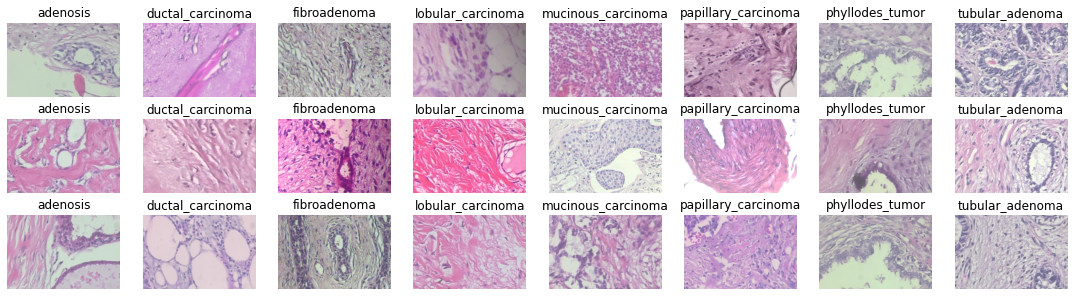

In [15]:
fig, axs = plt.subplots(3,8, figsize=(19,5))
for i in range(8):
    image200X.reset()
    while True:
        imgs, labels = image200X.next()
        imgs_cat = imgs[labels==i,:,:,:]
        labs_cat = list(image200X.class_indices)[i]
        if np.alen(imgs_cat) > 2:
            break
    for j in range(3):
        axs[j,i].imshow(imgs_cat[j,:,:,:])
        axs[j,i].set_title(labs_cat)
        axs[j,i].axis('off')

#### Plot sample images for magnitude 400x

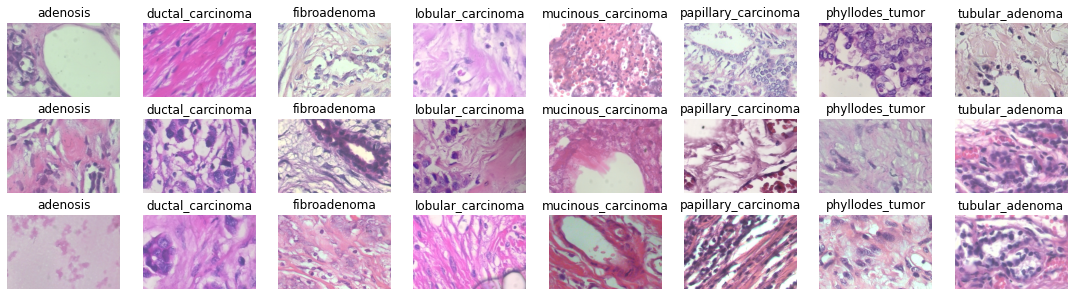

In [16]:
fig, axs = plt.subplots(3,8, figsize=(19,5))
for i in range(8):
    image400X.reset()
    while True:
        imgs, labels = image400X.next()
        imgs_cat = imgs[labels==i,:,:,:]
        labs_cat = list(image400X.class_indices)[i]
        if np.alen(imgs_cat) > 2:
            break
    for j in range(3):
        axs[j,i].imshow(imgs_cat[j,:,:,:])
        axs[j,i].set_title(labs_cat)
        axs[j,i].axis('off')